In [62]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader.data import DataReader
from datetime import datetime
from keras.layers import Dropout

In [63]:
df = pd.read_csv('Google_Stock_Price_Train.csv', parse_dates=['Date'], index_col='Date')

In [64]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [65]:
test_set= pd.read_csv('Google_Stock_Price_Test.csv', parse_dates=['Date'], index_col='Date')

In [66]:
test_set.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [67]:
df['Close'] = df['Close'].str.replace(',', '').astype('float')
df['Volume'] = df['Volume'].str.replace(',', '').astype('float')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [69]:
df.shape

(1258, 5)

In [70]:
test_set.shape

(20, 5)

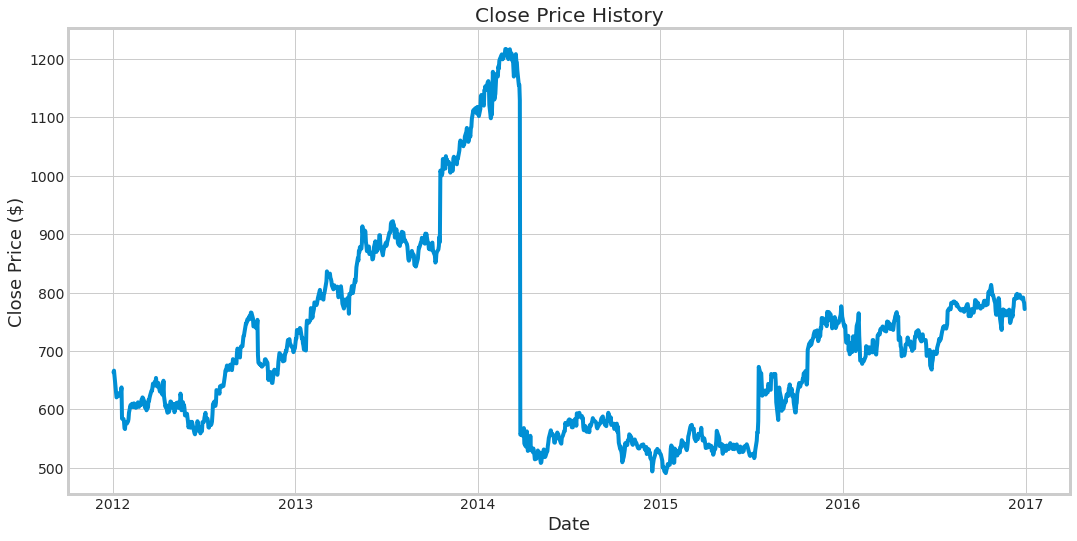

In [71]:
# Visual the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

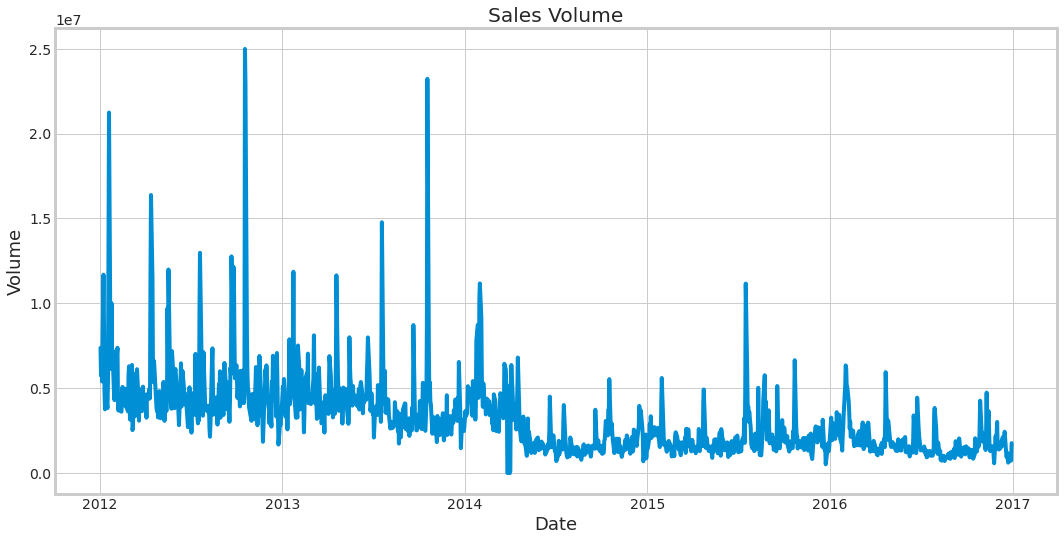

In [72]:
# Visual the closing price history
plt.figure(figsize=(16,8))
plt.title('Sales Volume')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

In [73]:
# Moving Average

In [74]:
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df[column_name] = df['Close'].rolling(ma).mean()
        

Text(0.5, 1.0, 'GOOGLE')

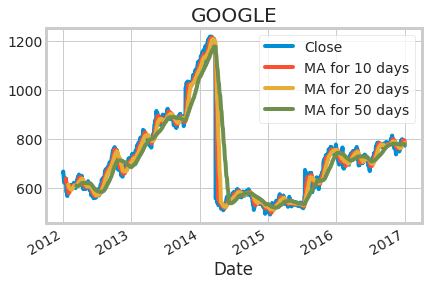

In [75]:
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('GOOGLE')

In [76]:
# Daily Return

Text(0.5, 1.0, 'GOOGLE')

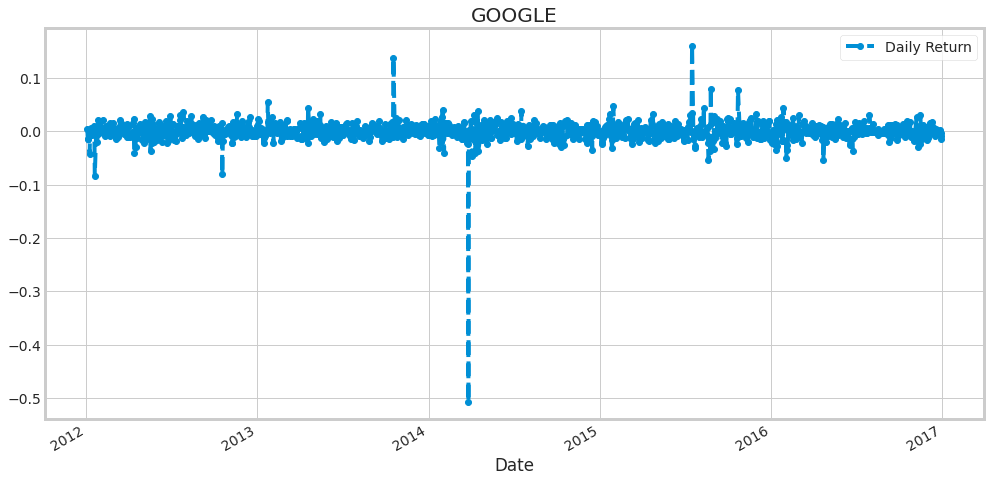

In [77]:
df['Daily Return'] = df['Close'].pct_change()
fig, axes = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
df['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.title('GOOGLE')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


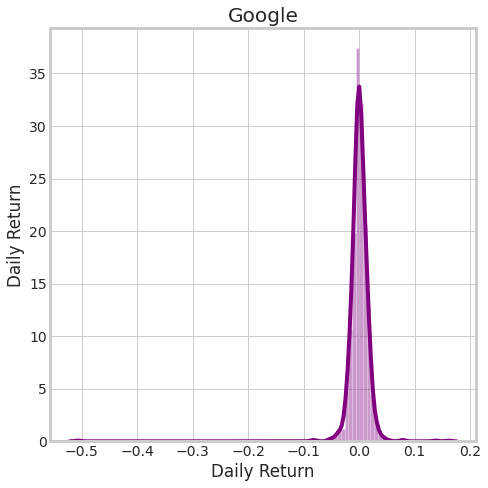

In [78]:
plt.figure(figsize=(7, 7))


plt.subplot()
sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('Google')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [79]:
closing_df = df[['Close']]
closing_df = closing_df.rename(columns={"Close":"Google"})

In [80]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,Google
Date,
2012-01-03,NaN
2012-01-04,0.004310
2012-01-05,-0.013865
2012-01-06,-0.013649
2012-01-09,-0.042392


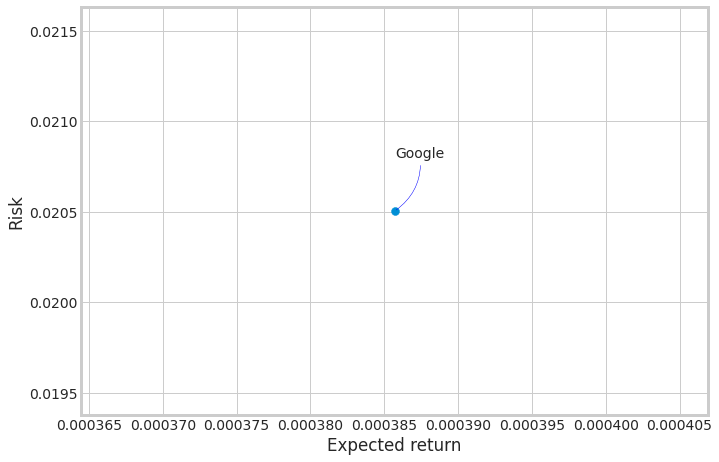

In [81]:
# How much value do we put at risk by investing in Google Stock ?

#There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns
# is by comparing the expected return with the standard deviation of the daily returns.


rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [82]:
#Predicting the closing price stock price of Google

In [83]:
data = df.filter(['Close'])
dataset = data.values
training_data_len= math.ceil(len(dataset)*0.8)
training_data_len

1007

In [84]:
scaler = MinMaxScaler()
scaled_data= scaler.fit_transform(dataset)

In [85]:
scaled_data

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [86]:
train_data= scaled_data[0:training_data_len,:]
x_train= []
y_train= []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [87]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [88]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(947, 60, 1)

In [143]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [144]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [145]:
model.fit(x_train,y_train, batch_size=32, epochs=100)

Epoch 1/100
30/30 [==============================] - 5s 57ms/step - loss: 0.0208
Epoch 2/100
30/30 [==============================] - 2s 57ms/step - loss: 0.0058
Epoch 3/100
30/30 [==============================] - 2s 59ms/step - loss: 0.0047
Epoch 4/100
30/30 [==============================] - 2s 56ms/step - loss: 0.0039
Epoch 5/100
30/30 [==============================] - 2s 57ms/step - loss: 0.0033
Epoch 6/100
30/30 [==============================] - 2s 57ms/step - loss: 0.0031
Epoch 7/100
30/30 [==============================] - 2s 59ms/step - loss: 0.0028
Epoch 8/100
30/30 [==============================] - 2s 60ms/step - loss: 0.0029
Epoch 9/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0027
Epoch 10/100
30/30 [==============================] - 2s 62ms/step - loss: 0.0025
Epoch 11/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0025
Epoch 12/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0023
Epoch 13/100
30/30 [=====

Epoch 1/20
30/30 - 12s - loss: 0.0307
Epoch 2/20
30/30 - 6s - loss: 0.0132
Epoch 3/20
30/30 - 6s - loss: 0.0085
Epoch 4/20
30/30 - 5s - loss: 0.0092
Epoch 5/20
30/30 - 6s - loss: 0.0081
Epoch 6/20
30/30 - 6s - loss: 0.0068
Epoch 7/20
30/30 - 6s - loss: 0.0058
Epoch 8/20
30/30 - 6s - loss: 0.0061
Epoch 9/20
30/30 - 6s - loss: 0.0067
Epoch 10/20
30/30 - 6s - loss: 0.0060
Epoch 11/20
30/30 - 6s - loss: 0.0051
Epoch 12/20
30/30 - 6s - loss: 0.0048
Epoch 13/20
30/30 - 6s - loss: 0.0056
Epoch 14/20
30/30 - 6s - loss: 0.0047
Epoch 15/20
30/30 - 6s - loss: 0.0049
Epoch 16/20
30/30 - 6s - loss: 0.0043
Epoch 17/20
30/30 - 6s - loss: 0.0036
Epoch 18/20
30/30 - 6s - loss: 0.0038
Epoch 19/20
30/30 - 6s - loss: 0.0040
Epoch 20/20
30/30 - 6s - loss: 0.0038


In [146]:
val_data= scaled_data[training_data_len-60:,:]
x_val= []
y_val= dataset[training_data_len:,:]
for i in range(60,len(val_data)):
  x_val.append(val_data[i-60:i,0])

In [147]:
x_val=np.array(x_val)

In [148]:
x_val= np.reshape(x_val,(x_val.shape[0],x_val.shape[1],1))

In [149]:
predictions = model.predict(x_val)

In [150]:
predictions= scaler.inverse_transform(predictions)

In [151]:
rmse = np.sqrt(np.mean(predictions- y_val)**2)

In [152]:
rmse

0.5572898931617287

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


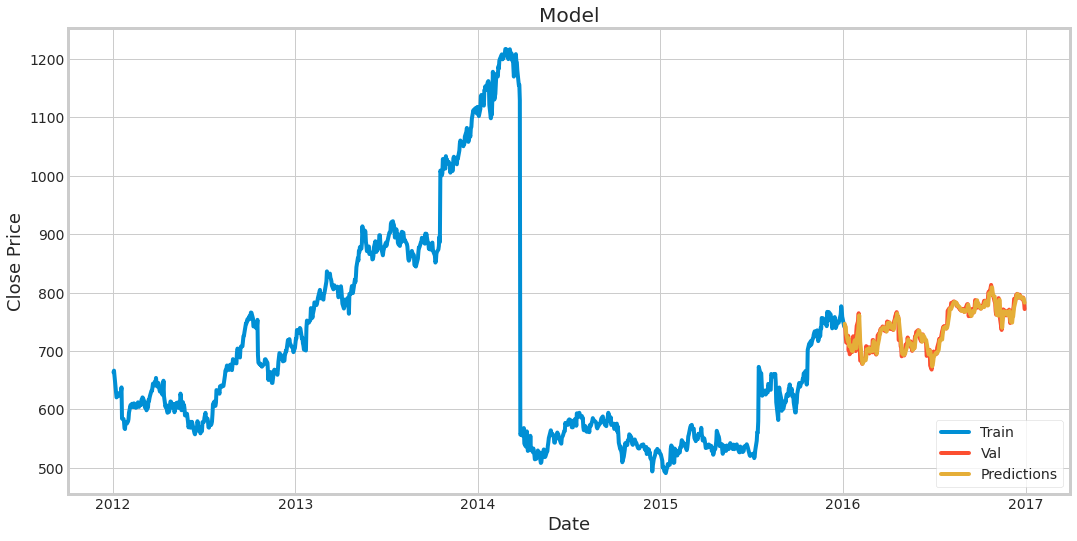

In [153]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [154]:
valid

,Close,Predictions
Date,,
2016-01-05,742.58,746.626526
2016-01-06,743.62,741.062866
2016-01-07,726.39,740.907410
2016-01-08,714.47,730.083374
2016-01-11,716.03,718.122253
...,...,...
2016-12-23,789.91,791.151794
2016-12-27,791.55,789.346130
2016-12-28,785.05,790.175232


In [155]:
real_stock_price = test_set.iloc[:, 3:4].values

In [156]:
real_stock_price

array([[786.14],
       [786.9 ],
       [794.02],
       [806.15],
       [806.65],
       [804.79],
       [807.91],
       [806.36],
       [807.88],
       [804.61],
       [806.07],
       [802.17],
       [805.02],
       [819.31],
       [823.87],
       [835.67],
       [832.15],
       [823.31],
       [802.32],
       [796.79]])

In [159]:
dataset_total = pd.concat((df['Close'], test_set['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

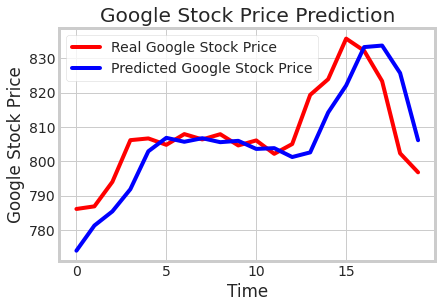

In [160]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()